In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42

file = "/mnt/project/exonhancer/ZENODO_REPO/PanCancer_analysis/treat_mc3_file/tcga_snp_exonhancers_for_plot_hg19.tsv"

content = []
with open(file)as f:
    for line in f:
        content.append(line.strip().split('\t'))

df = pd.DataFrame(content)

#count the number of snp per patient in a given cancer type 
grouped_df = df.groupby([5,6])
dic_snp = {}
for group_name, group_df in grouped_df:
    num_snp = group_df.shape[0]  
    if group_name[1] not in dic_snp:  
        dic_snp[group_name[1]] = [num_snp]
    else:
        dic_snp[group_name[1]].append(num_snp)

###get color code and labels 
def rgb_to_hex(rgb):
    # Convert the RGB values from the range [0, 1] to [0, 255]
    r, g, b = [int(x * 255) for x in rgb]
    # Convert to hexadecimal format and remove the "0x" prefix
    hex_color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    return hex_color

file = "other_files/colors_tcga_rgb_dic.tsv"

dic_color = {}
with open(file)as f:
    for line in f:
        dic_color[line.strip().split('\t')[0]] = (line.strip().split('\t')[1],line.strip().split('\t')[2],line.strip().split('\t')[3])

            0          1          2  3  4     5     6
0       chr10  100011328  100011329  G  A  1474    OV
1       chr10  100011328  100011329  G  T  A1LX  UCEC
2       chr10  100011377  100011378  A  G  0795    OV
3       chr10  100011398  100011399  C  A  A2GH  SKCM
4       chr10  100011404  100011405  C  T  A431  SKCM
...       ...        ...        ... .. ..   ...   ...
371482   chrX   99551848   99551849  C  T  7132  STAD
371483   chrX   99551848   99551849  C  T  A1E0  UCEC
371484   chrX   99551848   99551849  C  T  A3FH  UCEC
371485   chrX   99551855   99551856  G  A  A3R5  SKCM
371486   chrX   99551864   99551865  C  T  AA1V  SKCM

[371487 rows x 7 columns]


[('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '0.590415292863046'), ('0.21352042867725984', '0.4733954145212529', '

/home/mouren/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mouren/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


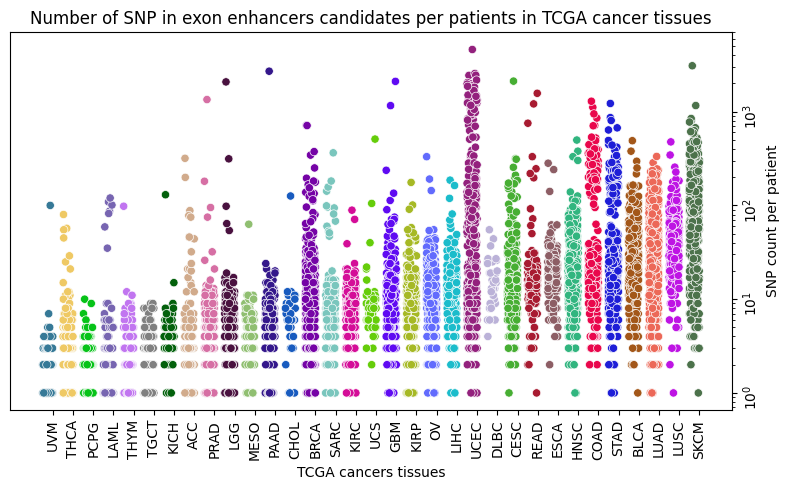

In [ ]:
# Create a list to store the data for plotting
plot_data = []

for key, values in dic_snp.items():
    for value in values:
        plot_data.append({'Category': key, 'Value': value})

# Create a DataFrame from the data
df = pd.DataFrame(plot_data)

# Calculate the order of the categories based on the median values
category_order = df.groupby('Category')['Value'].median().sort_values().index

# Sort the DataFrame by the order of categories
df['Category'] = pd.Categorical(df['Category'], category_order)
df = df.sort_values('Category')

# Map colors to each category in the DataFrame
color_list = [dic_color[i] for i in df["Category"].values]
print(color_list)

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
df['Category'] = pd.factorize(df['Category'])[0]+np.random.random(len(df))*0.5-0.5
ax = sns.scatterplot(x='Category', y='Value', data=df, c=color_list)

plt.xlabel('TCGA cancers tissues')
plt.ylabel('SNP count per patient')
plt.yscale('log') 

ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.tick_params(axis='y', rotation=90)

plt.xticks(range(len(category_order)), category_order, rotation=90,fontsize=10)

plt.title('Number of SNP in exon enhancers candidates per patients in TCGA cancer tissues')

plt.tight_layout()
plt.savefig("/home/mouren/Images/tls1/variants/tcga/scatter_snp_tcga_patient_exonhancers_tight.pdf", format="pdf", bbox_inches="tight")

plt.show()